In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm, preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn.preprocessing import StandardScaler, label_binarize

In [2]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)
fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)



In [3]:
def count_results(y_test, y_predicted, y_predicted_proba):
    try:
        print('Accuracy score:')
        print(metrics.accuracy_score(y_test, y_predicted))
        print('Zero one loss score:')
        print(metrics.zero_one_loss(y_test, y_predicted))
        print('F1 score:')
        print(metrics.f1_score(y_test, y_predicted, average = None))
        print('\n')
        print(skplt.metrics.plot_precision_recall(y_test, y_predicted_proba))
        print(skplt.metrics.plot_roc(y_test, y_predicted_proba))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.rcParams['font.size'] = 10
        plt.show()
        print('\n')
        print('Hinge loss score:')
        print(metrics.hinge_loss(y_test, y_predicted_proba))
    except:
        pass

In [4]:
def train_model_for_different_times(dataset):

    Cs = [0.1, 0.4, 1]
    test_size = 0.25
    
    x_dataset = dataset.data[0:35000]
    y_dataset = dataset.target[0:35000]

    for C in Cs:
    
        print('----------------------------------------------------------------------------------------------------------')
        print('C value ' + str(C))
        print('Rozmiar testowy ' + str(test_size))
        print('Rozmiar treningowy ' + str(1 - test_size))
        x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=test_size)

        scaler = StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        x_dataset = scaler.transform(x_dataset)
        
        print('Start fit.')
        start_fit = timer()
        linear_svc = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True, C=C), n_jobs=6).fit(x_train, y_train)
        end_fit = timer()
        print('Finished fit. Time: ' + str(end_fit - start_fit))
        
        print('Start predicted.')
        start_pred = timer()
        y_predicted = linear_svc.predict(x_test)
        end_pred = timer()
        print('Finished pred. Time: ' + str(end_pred - start_pred))
        
        print('Start predicted proba.')
        start_pred_proba = timer()
        y_predicted_proba = linear_svc.predict_proba(x_test)
        end_pred_proba = timer()
        print('Finished pred. Time: ' + str(end_pred_proba - start_pred_proba))
    
        count_results(y_test, y_predicted, y_predicted_proba)


----------------------------------------------------------------------------------------------------------
C value 0.1
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 3464.2959241000003
Start predicted.
Finished pred. Time: 162.9659683
Start predicted proba.
Finished pred. Time: 138.19181789999993
Accuracy score:
0.9106285714285715
Zero one loss score:
0.08937142857142855
F1 score:
[0.95304348 0.95716396 0.8857645  0.88850967 0.91710758 0.88411458
 0.93626622 0.93088553 0.85854859 0.87995533]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


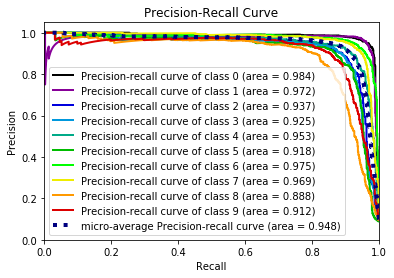

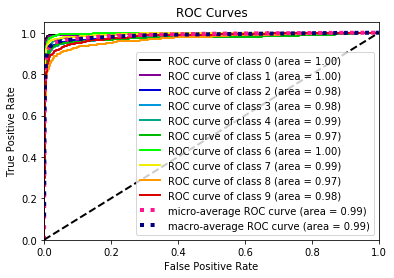



Hinge loss score:
0.35811067979832073
----------------------------------------------------------------------------------------------------------
C value 0.4
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 4924.7805429
Start predicted.
Finished pred. Time: 96.48549869999988
Start predicted proba.
Finished pred. Time: 96.59308880000026
Accuracy score:
0.9038857142857143
Zero one loss score:
0.09611428571428571
F1 score:
[0.95008413 0.9548577  0.88706846 0.87421742 0.91386195 0.86545925
 0.93507973 0.92102336 0.84931507 0.86887115]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


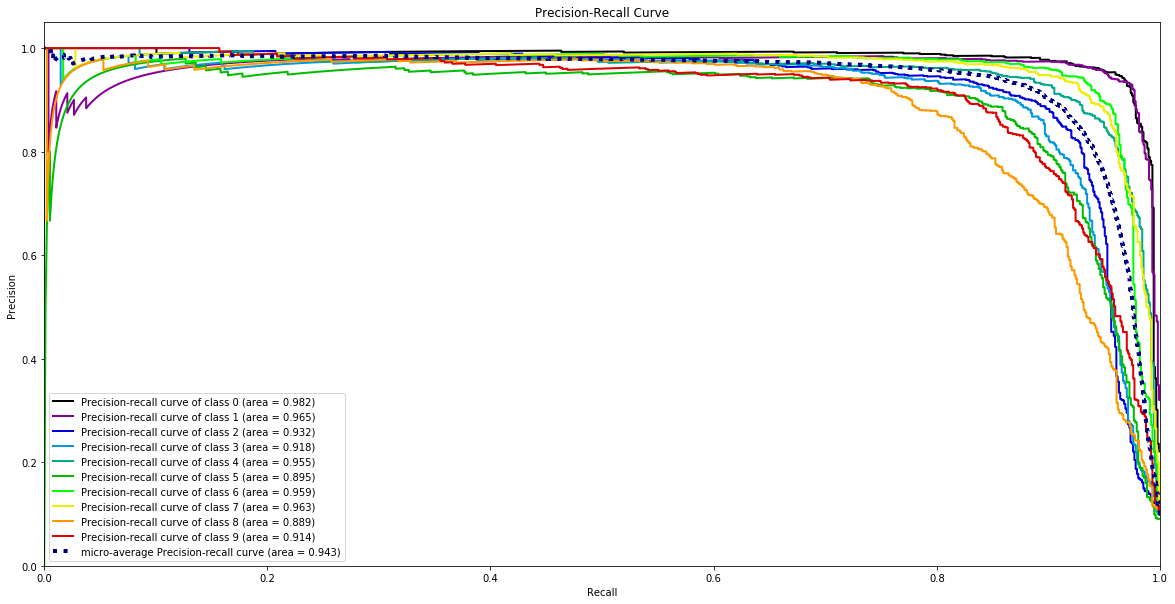

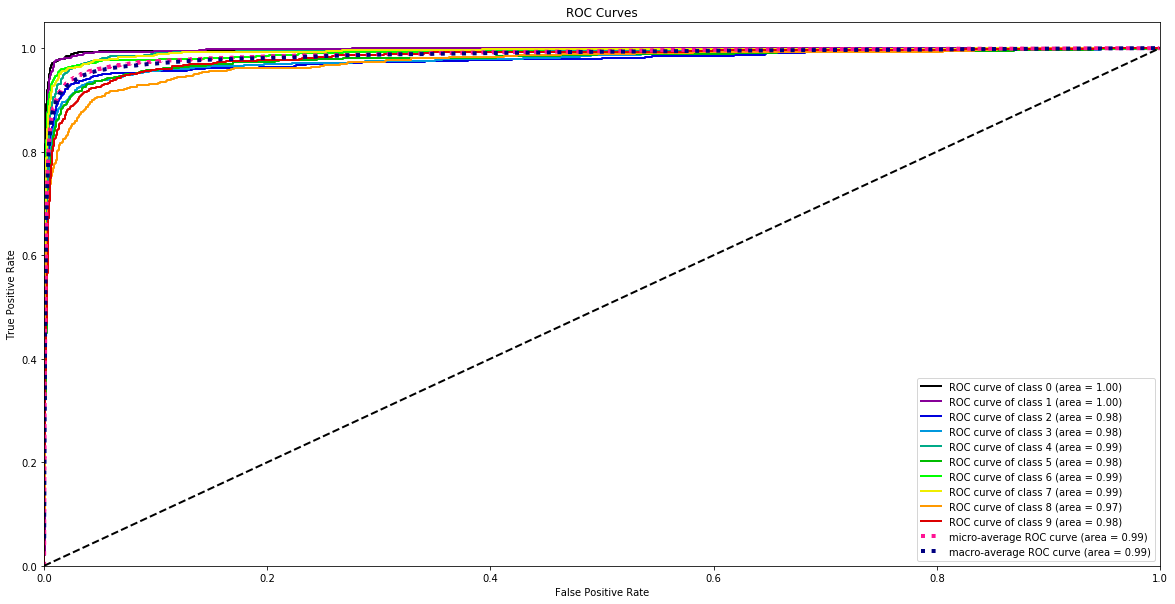



Hinge loss score:
0.381940221210178
----------------------------------------------------------------------------------------------------------
C value 1
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 8882.229569000001
Start predicted.
Finished pred. Time: 95.35166050000043
Start predicted proba.
Finished pred. Time: 95.20960059999925
Accuracy score:
0.9045714285714286
Zero one loss score:
0.09542857142857142
F1 score:
[0.94929245 0.9491696  0.87126437 0.88767721 0.91174752 0.87092568
 0.94591484 0.91577825 0.86347305 0.86931155]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


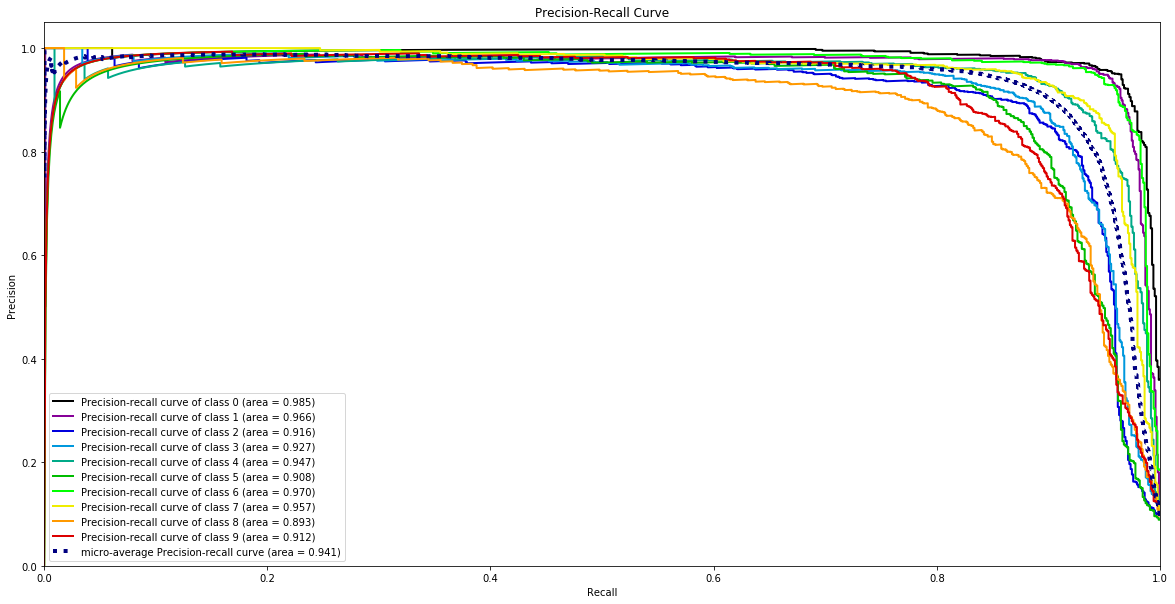

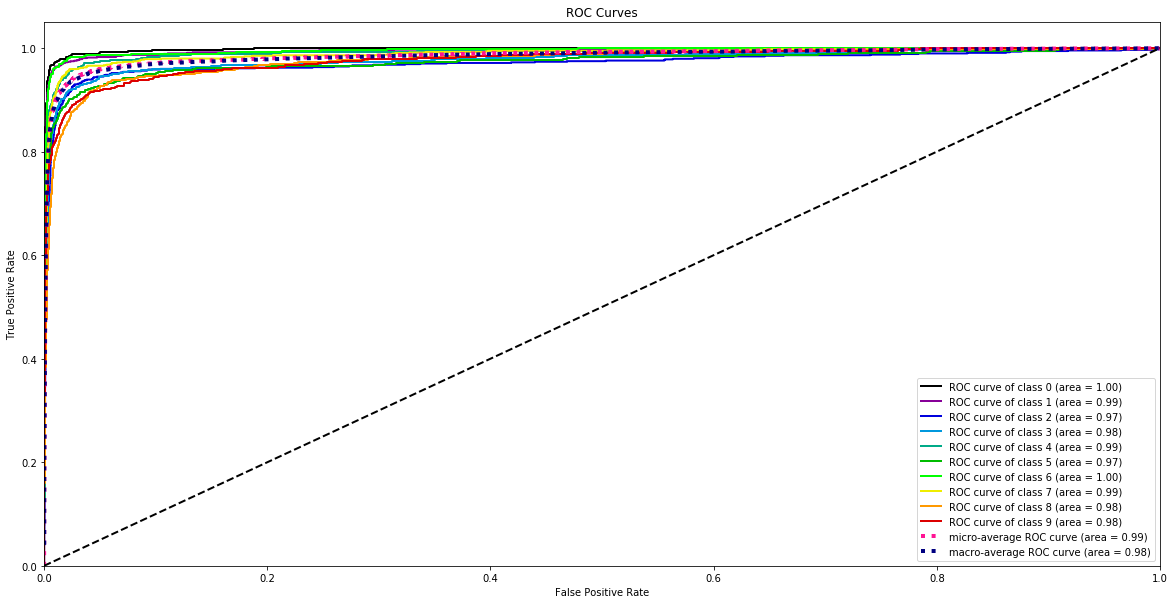



Hinge loss score:
0.39315568727912165
----------------------------------------------------------------------------------------------------------
C value 0.1
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 2591.6914241000013
Start predicted.
Finished pred. Time: 138.22785529999965
Start predicted proba.
Finished pred. Time: 138.21196500000224
Accuracy score:
0.8430857142857143
Zero one loss score:
0.15691428571428567
F1 score:
[0.7766323  0.96551724 0.75069406 0.84253819 0.76548673 0.93159609
 0.60885385 0.91633914 0.92022472 0.94404762]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


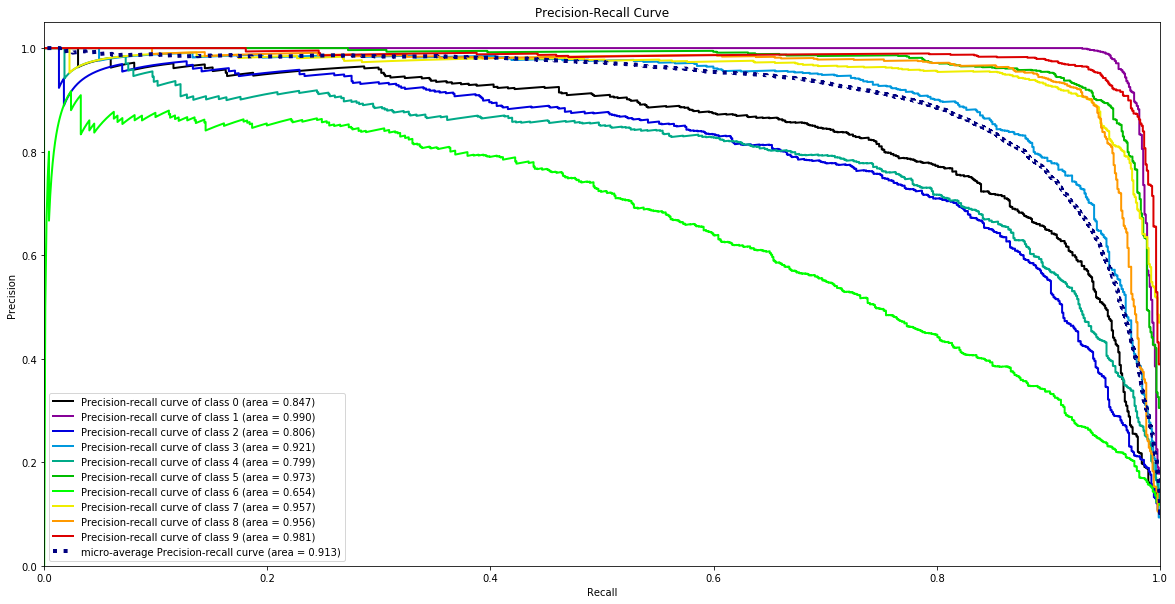

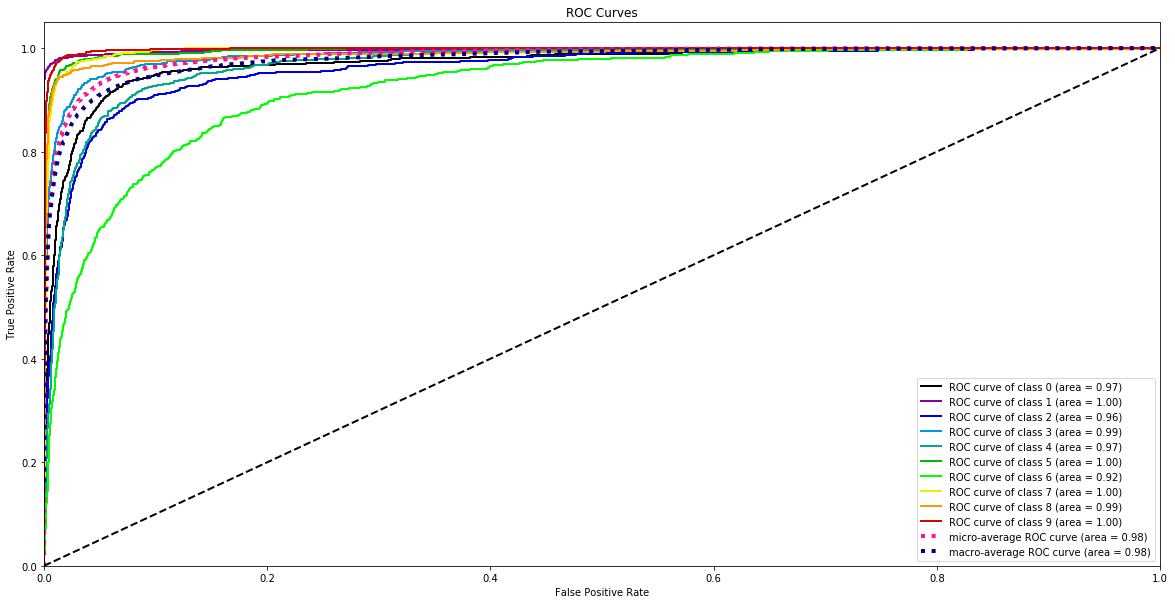



Hinge loss score:
0.4813572255719163
----------------------------------------------------------------------------------------------------------
C value 0.4
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 5234.822235600001
Start predicted.
Finished pred. Time: 134.852426999998
Start predicted proba.
Finished pred. Time: 134.70948599999974
Accuracy score:
0.8377142857142857
Zero one loss score:
0.16228571428571426
F1 score:
[0.79456706 0.96068376 0.73551348 0.85205184 0.74958171 0.90728477
 0.59452736 0.90846287 0.91958042 0.937682  ]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


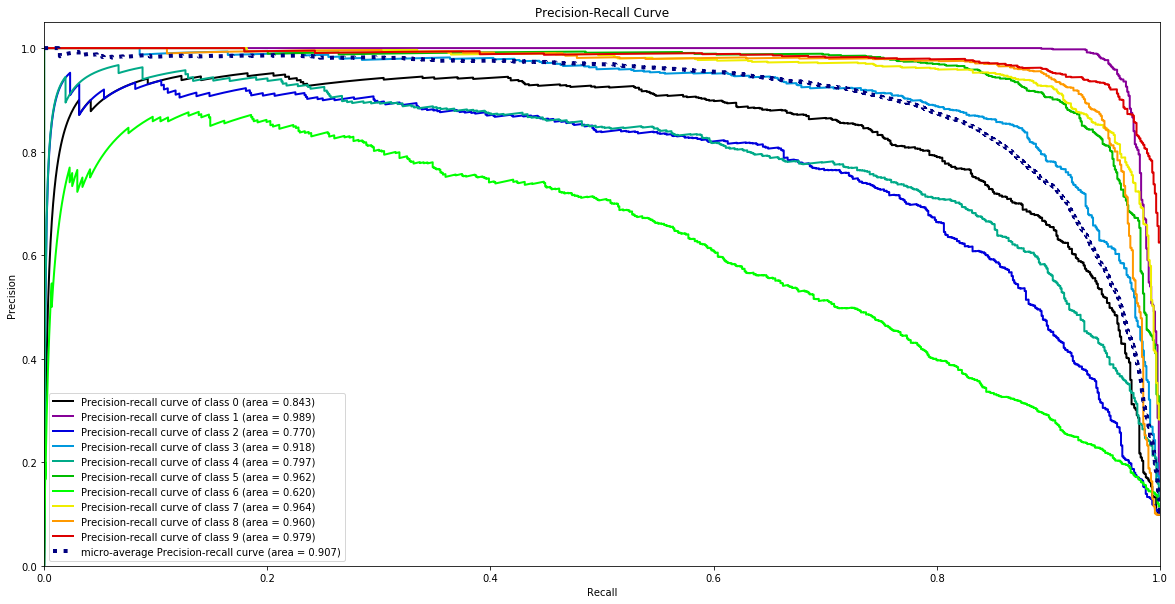

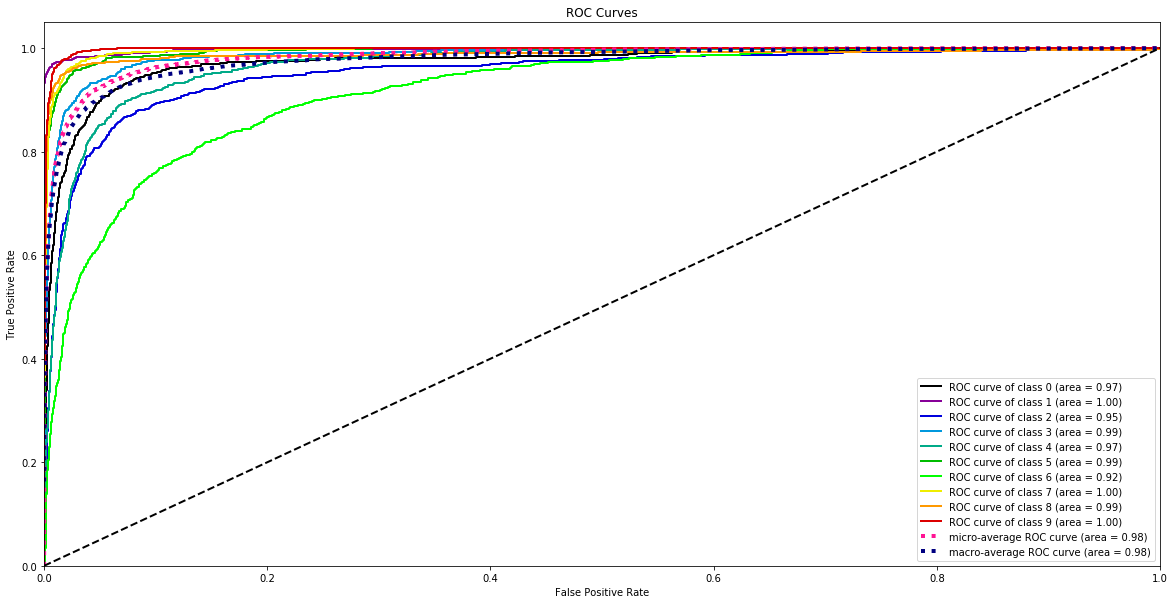



Hinge loss score:
0.5093174579034456
----------------------------------------------------------------------------------------------------------
C value 1
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 10067.676709599997
Start predicted.
Finished pred. Time: 134.00023769999825
Start predicted proba.
Finished pred. Time: 133.40004739999858
Accuracy score:
0.8317714285714286
Zero one loss score:
0.1682285714285714
F1 score:
[0.78558977 0.95642702 0.74855825 0.8373852  0.74123539 0.90668203
 0.56025237 0.90540541 0.92027335 0.92622951]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


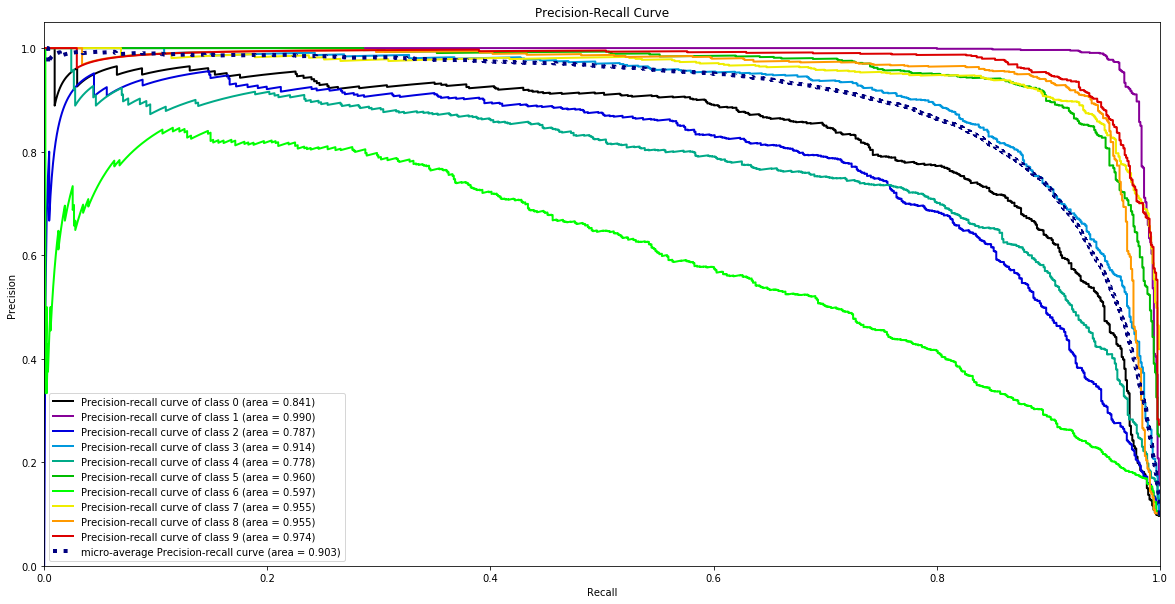

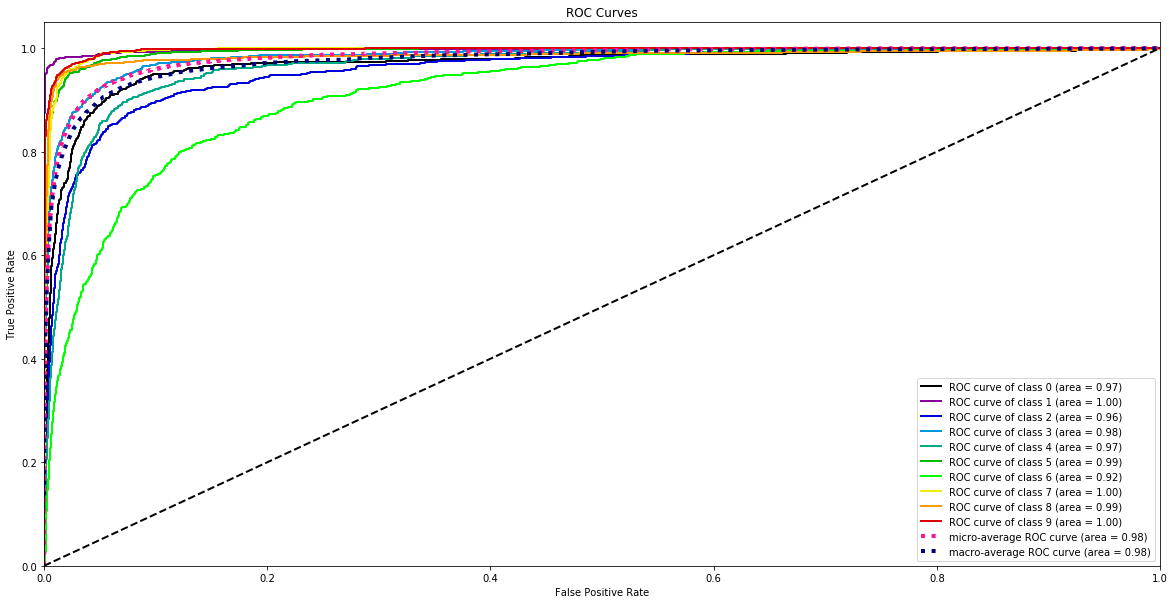



Hinge loss score:
0.5274213389774925


In [5]:
train_model_for_different_times(mnist)
train_model_for_different_times(fmnist)

In [6]:
def train_model_for_different_training_sizes(dataset):

    C = 0.7
    train_sizes = [0.5, 0.75, 0.85]
    
    x_dataset = dataset.data[0:35000]
    y_dataset = dataset.target[0:35000]

    for train_size in train_sizes:
        test_size = 1 - train_size
        print('----------------------------------------------------------------------------------------------------------')
        print('C value ' + str(C))
        print('Rozmiar testowy ' + str(test_size))
        print('Rozmiar treningowy ' + str(train_size))
        x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=test_size)

        scaler = StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        x_dataset = scaler.transform(x_dataset)
        
        print('Start fit.')
        start_fit = timer()
        linear_svc = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True, C=C), n_jobs=6).fit(x_train, y_train)
        end_fit = timer()
        print('Finished fit. Time: ' + str(end_fit - start_fit))
        
        print('Start predicted.')
        start_pred = timer()
        y_predicted = linear_svc.predict(x_test)
        end_pred = timer()
        print('Finished pred. Time: ' + str(end_pred - start_pred))
        
        print('Start predicted proba.')
        start_pred_proba = timer()
        y_predicted_proba = linear_svc.predict_proba(x_test)
        end_pred_proba = timer()
        print('Finished pred. Time: ' + str(end_pred_proba - start_pred_proba))
    
        count_results(y_test, y_predicted, y_predicted_proba)

----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.5
Rozmiar treningowy 0.5
Start fit.
Finished fit. Time: 1361.3576070999989
Start predicted.
Finished pred. Time: 129.33784059999743
Start predicted proba.
Finished pred. Time: 128.59164579999924
Accuracy score:
0.8973142857142857
Zero one loss score:
0.10268571428571427
F1 score:
[0.94633324 0.94744745 0.87125749 0.8691935  0.89722386 0.86775244
 0.93268404 0.91902174 0.84455959 0.86351931]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


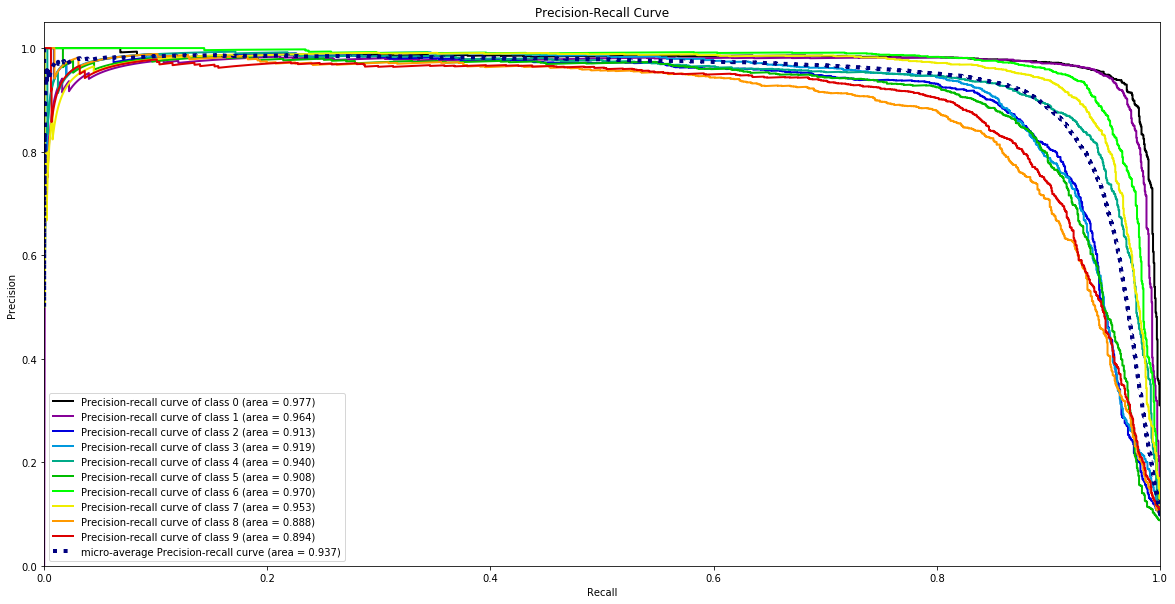

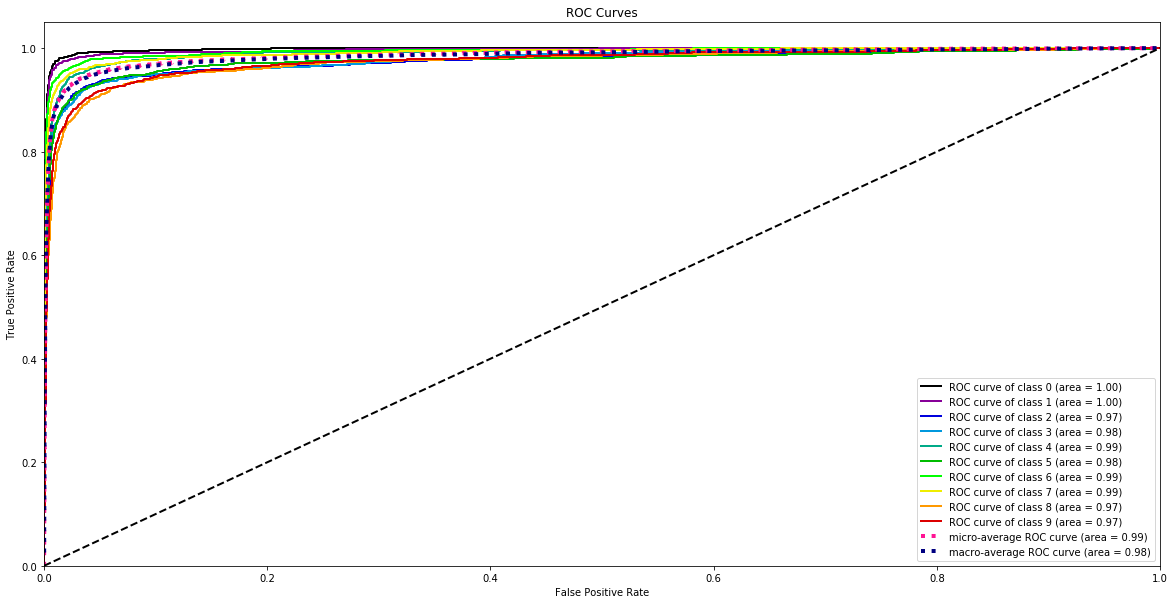



Hinge loss score:
0.4235305886828221
----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 6764.939333499999
Start predicted.
Finished pred. Time: 97.10830569999962
Start predicted proba.
Finished pred. Time: 97.12705390000338
Accuracy score:
0.9077714285714286
Zero one loss score:
0.09222857142857144
F1 score:
[0.95146794 0.95863747 0.88151659 0.87930029 0.92244418 0.88019863
 0.94311718 0.91749175 0.84957882 0.88144896]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


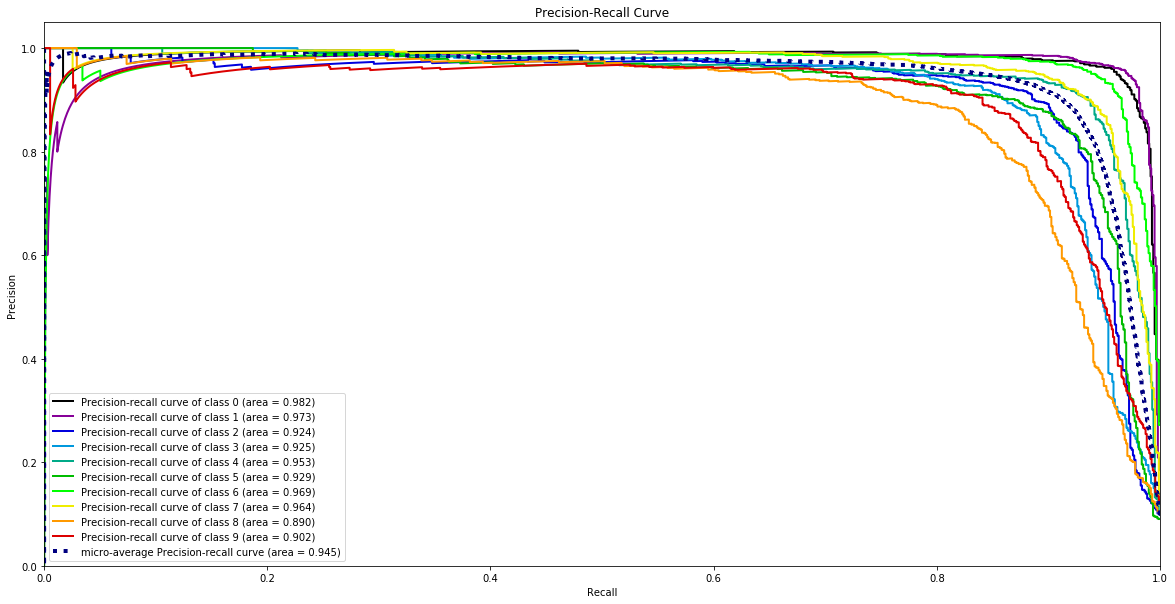

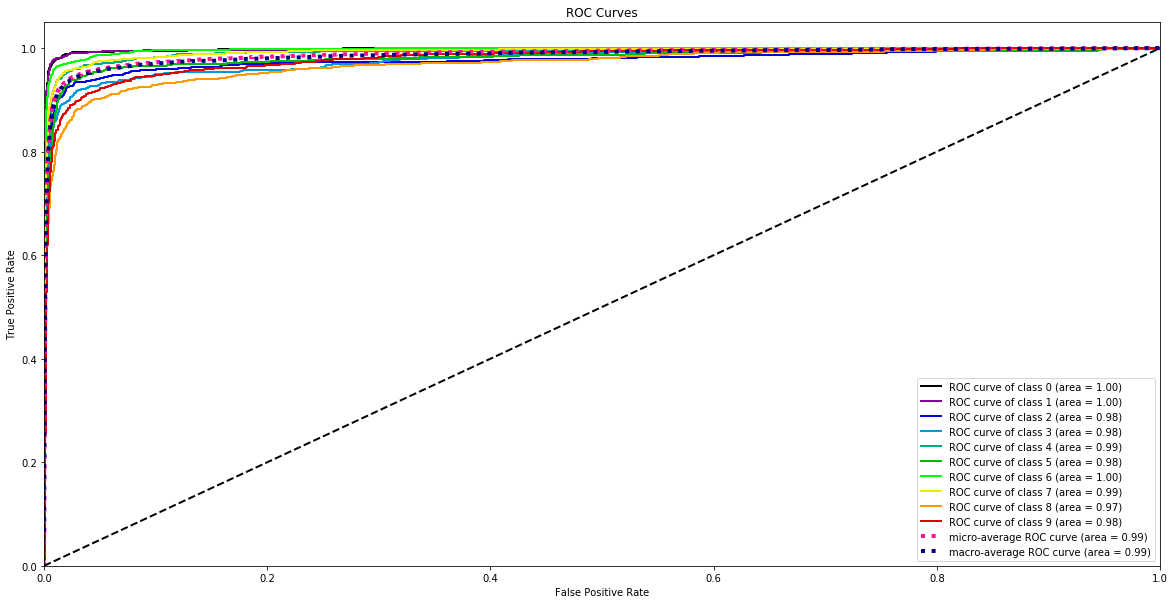



Hinge loss score:
0.38759731925284097
----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.15000000000000002
Rozmiar treningowy 0.85
Start fit.
Finished fit. Time: 11314.6153777
Start predicted.
Finished pred. Time: 65.08724360000633
Start predicted proba.
Finished pred. Time: 65.15569500000129
Accuracy score:
0.9051609217291945
Zero one loss score:
0.09483907827080551
F1 score:
[0.95434199 0.95162569 0.86429259 0.87931034 0.9227836  0.86098655
 0.94477318 0.91064639 0.84210526 0.89970789]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


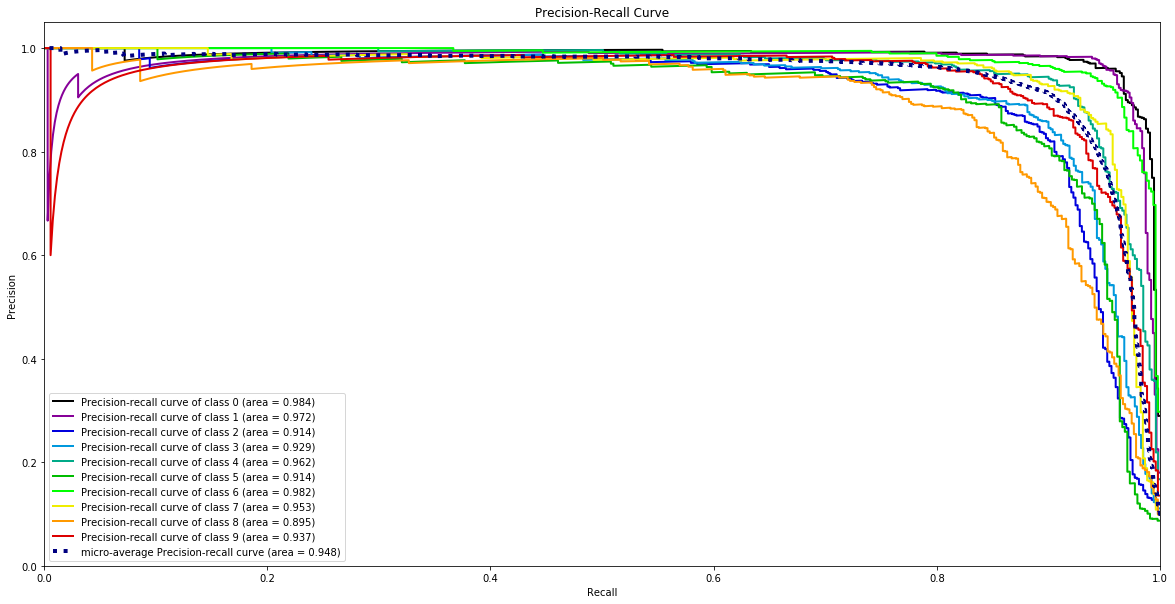

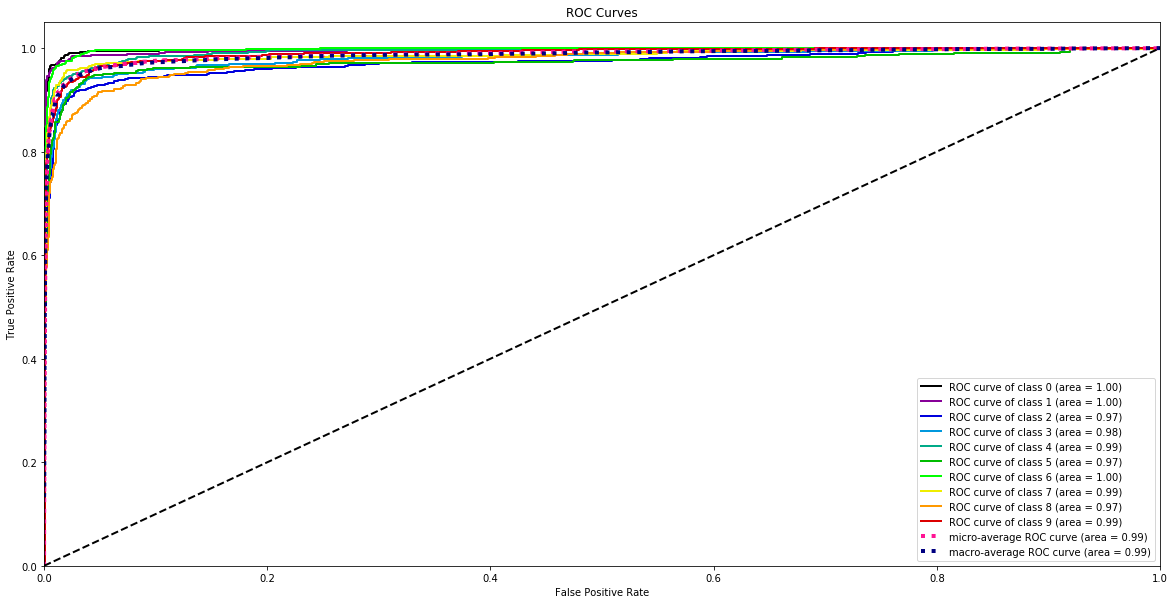



Hinge loss score:
0.3810362586032439
----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.5
Rozmiar treningowy 0.5
Start fit.
Finished fit. Time: 1534.067218600001
Start predicted.
Finished pred. Time: 179.95703860000503
Start predicted proba.
Finished pred. Time: 179.966222199997
Accuracy score:
0.8219428571428572
Zero one loss score:
0.1780571428571428
F1 score:
[0.77711696 0.95064498 0.73496403 0.82475975 0.72906945 0.89635372
 0.56776213 0.89901547 0.89430417 0.92239468]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


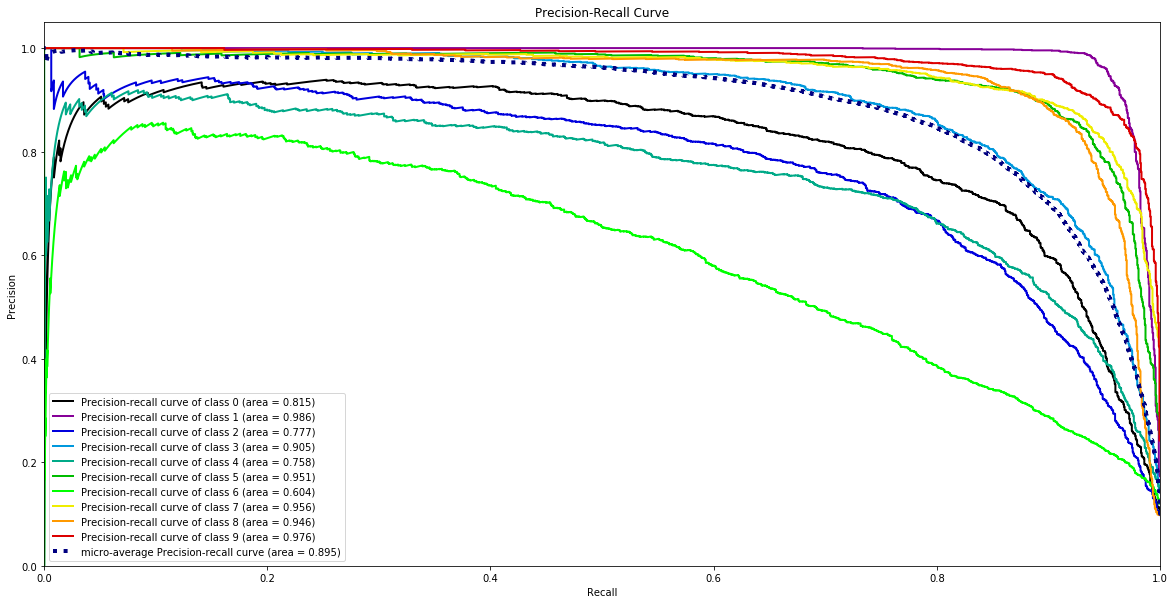

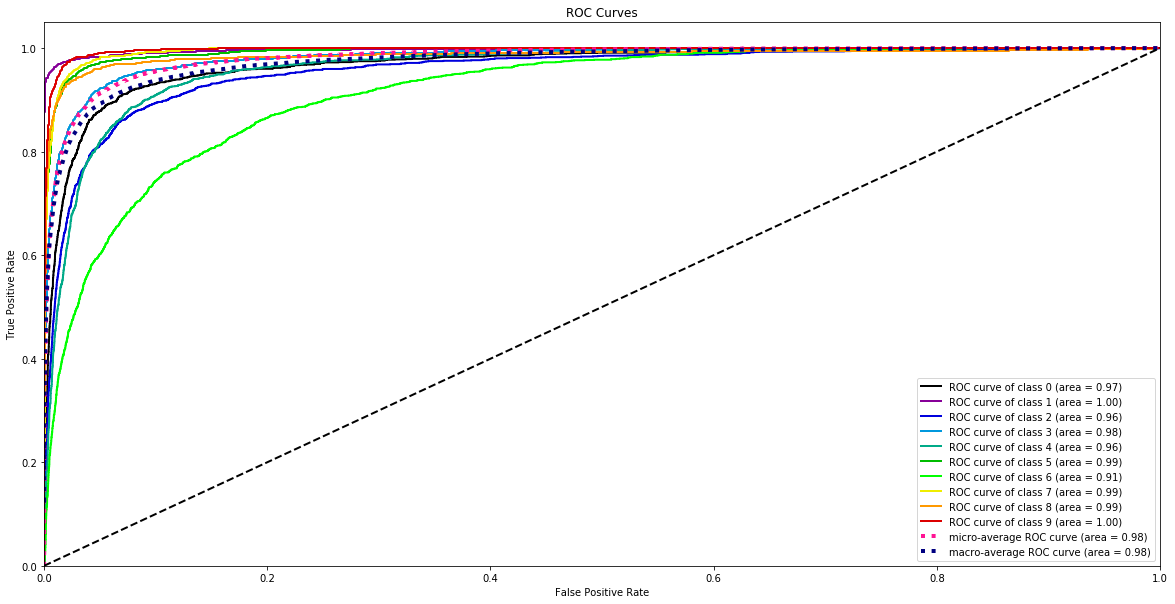



Hinge loss score:
0.5490024636391612
----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.25
Rozmiar treningowy 0.75
Start fit.
Finished fit. Time: 7368.231792999992
Start predicted.
Finished pred. Time: 132.47709709999617
Start predicted proba.
Finished pred. Time: 133.31086169999617
Accuracy score:
0.8298285714285715
Zero one loss score:
0.17017142857142853
F1 score:
[0.77679558 0.95865922 0.73006834 0.84129599 0.74887892 0.91152503
 0.56701668 0.91044776 0.90603248 0.93202765]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


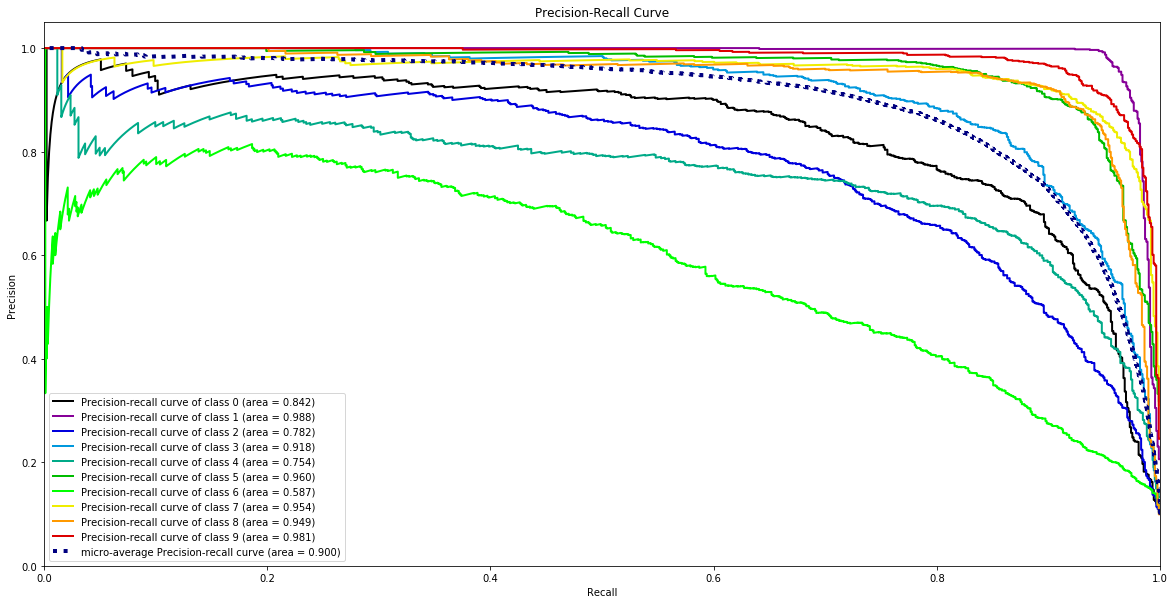

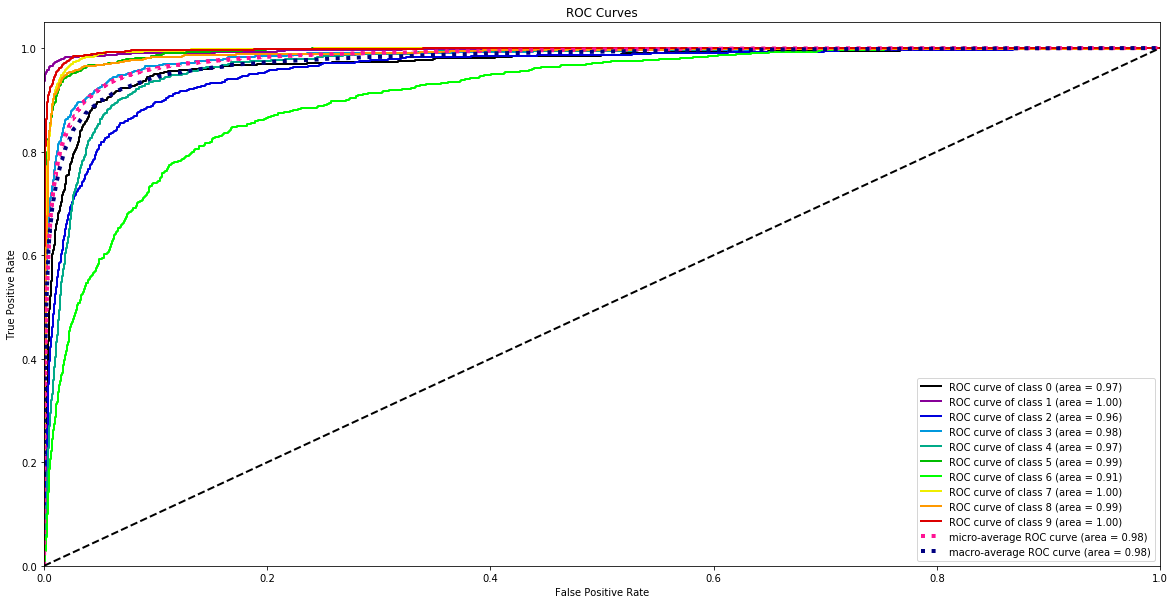



Hinge loss score:
0.5222648039150383
----------------------------------------------------------------------------------------------------------
C value 0.7
Rozmiar testowy 0.15000000000000002
Rozmiar treningowy 0.85
Start fit.
Finished fit. Time: 13476.758675500008
Start predicted.
Finished pred. Time: 91.78910120000364
Start predicted proba.
Finished pred. Time: 91.47769249998964
Accuracy score:
0.8465054275376119
Zero one loss score:
0.15349457246238807
F1 score:
[0.79926673 0.95619048 0.74743709 0.84139265 0.76134122 0.93668529
 0.61600811 0.93084112 0.91557223 0.94343241]


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


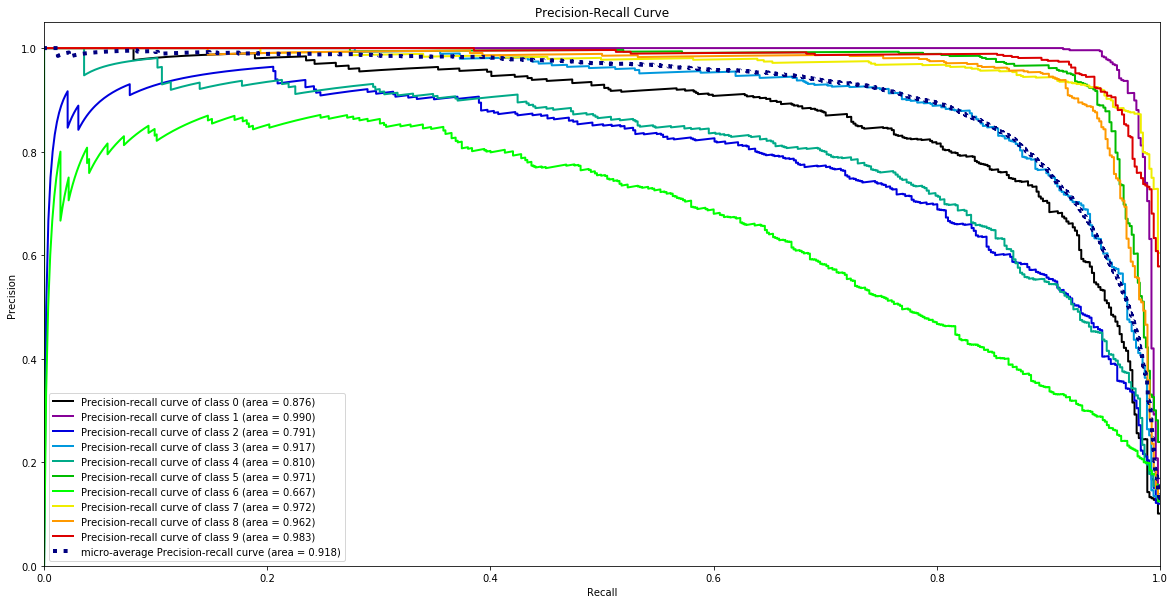

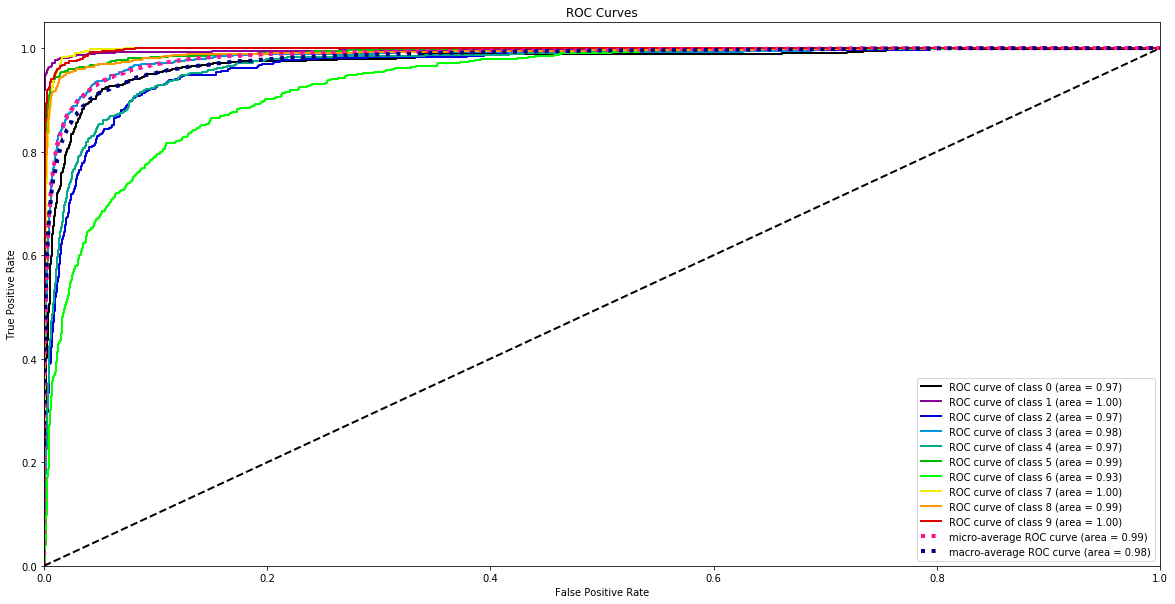



Hinge loss score:
0.5026106171012542


In [7]:
train_model_for_different_training_sizes(mnist)
train_model_for_different_training_sizes(fmnist)